In [1]:
# BEHAVIOUR - 

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 

#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw'
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'


Env: clapfcstimulation


animalID: 22101 - StimuliID: 5 - ind: 180
animalID: 22102 - StimuliID: 5 - ind: 181
animalID: 22103 - StimuliID: 5 - ind: 204
animalID: 22105 - StimuliID: 5 - ind: 205
animalID: 22107 - StimuliID: 5 - ind: 185
animalID: 2303 - StimuliID: 5 - ind: 426
animalID: 2304 - StimuliID: 5 - ind: 427
animalID: 2306 - StimuliID: 5 - ind: 401
animalID: 2307 - StimuliID: 5 - ind: 411
animalID: 2308 - StimuliID: 5 - ind: 394
animalID: 2310 - StimuliID: 5 - ind: 396
animalID: 2311 - StimuliID: 5 - ind: 397
animalID: 2312 - StimuliID: 5 - ind: 434
animalID: 22101 - StimuliID: 3 - ind: 174
animalID: 22105 - StimuliID: 3 - ind: 176
animalID: 22107 - StimuliID: 3 - ind: 178
animalID: 2303 - StimuliID: 3 - ind: 487
animalID: 2304 - StimuliID: 3 - ind: 497
animalID: 2306 - StimuliID: 3 - ind: 504
animalID: 2307 - StimuliID: 3 - ind: 506
animalID: 2308 - StimuliID: 3 - ind: 508
animalID: 2310 - StimuliID: 3 - ind: 491
animalID: 2311 - StimuliID: 3 - ind: 499
animalID: 2312 - StimuliID: 3 - ind: 495
animalID

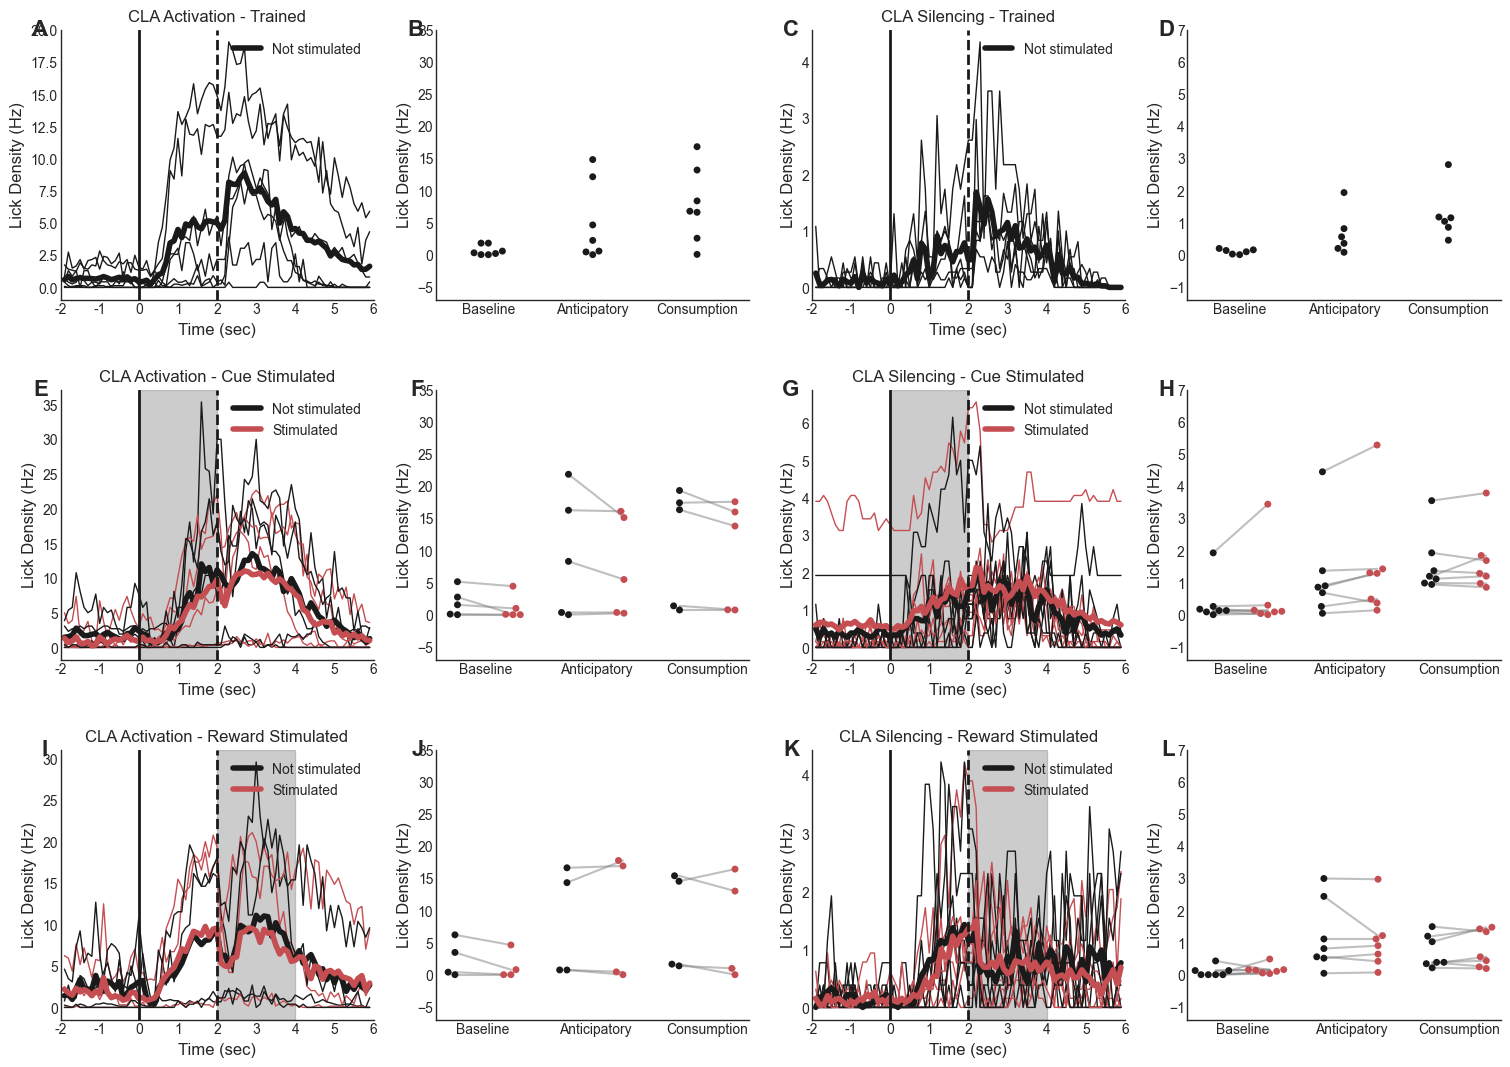

In [2]:
# Figure 5 : Behaviour Analysis


plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspecs

gs_lickAllTraceNoStim      = fig.add_gridspec(ncols=4, nrows=1, bottom=0.80, top=0.95, left=0.05, right=0.95,
                              wspace=0.2, hspace=0.4)
gs_lickAllTraceCueStim      = fig.add_gridspec(ncols=4, nrows=1, bottom=0.60, top=0.75, left=0.05, right=0.95,
                              wspace=0.2, hspace=0.4)
gs_lickAllTraceRewardStim   = fig.add_gridspec(ncols=4, nrows=1, bottom=0.40, top=0.55, left=0.05, right=0.95,
                              wspace=0.2, hspace=0.4)


postStimDur = 6
preStimDur = 2

total_num_axis = gs_lickAllTraceNoStim.get_geometry()[0]* gs_lickAllTraceNoStim.get_geometry()[1]
ax_gs_lickAllTraceNoStim= {xx: fig.add_subplot(gs_lickAllTraceNoStim[xx]) for xx in range(total_num_axis)}
interestedCohort = 'Chrimson'
dataCh5 = pfun.plot_lickDensityTracesStimulation(interestedCohort,5, ax_gs_lickAllTraceNoStim[0],ax_gs_lickAllTraceNoStim[1])
interestedCohort = 'OPN3'
dataOp5 = pfun.plot_lickDensityTracesStimulation(interestedCohort,5, ax_gs_lickAllTraceNoStim[2],ax_gs_lickAllTraceNoStim[3])


# Panel B: Trace for Cue Stimuli
total_num_axis = gs_lickAllTraceCueStim.get_geometry()[0]* gs_lickAllTraceCueStim.get_geometry()[1]
ax_gs_lickAllTraceCueStim= {xx: fig.add_subplot(gs_lickAllTraceCueStim[xx]) for xx in range(total_num_axis)}
interestedCohort = 'Chrimson'
dataCh3 = pfun.plot_lickDensityTracesStimulation(interestedCohort,3, ax_gs_lickAllTraceCueStim[0],ax_gs_lickAllTraceCueStim[1])
interestedCohort = 'OPN3'
dataOp3 = pfun.plot_lickDensityTracesStimulation(interestedCohort,3, ax_gs_lickAllTraceCueStim[2],ax_gs_lickAllTraceCueStim[3])

# Panel C: Trace for Reward Stimuli
total_num_axis = gs_lickAllTraceRewardStim.get_geometry()[0]* gs_lickAllTraceRewardStim.get_geometry()[1]
ax_gs_lickAllTraceRewardStim= {xx: fig.add_subplot(gs_lickAllTraceRewardStim[xx]) for xx in range(total_num_axis)}
interestedCohort = 'Chrimson'
dataCh4 = pfun.plot_lickDensityTracesStimulation(interestedCohort,4, ax_gs_lickAllTraceRewardStim[0],ax_gs_lickAllTraceRewardStim[1])
interestedCohort = 'OPN3'
dataOp4 = pfun.plot_lickDensityTracesStimulation(interestedCohort,4, ax_gs_lickAllTraceRewardStim[2],ax_gs_lickAllTraceRewardStim[3])

########## Stats
dataCh5 [ 'StimulationType'] = 'NoStimulation'
dataOp5 [ 'StimulationType'] = 'NoStimulation'
dataCh3 [ 'StimulationType'] = 'CueStimulation'
dataOp3 [ 'StimulationType'] = 'CueStimulation'
dataCh4 [ 'StimulationType'] = 'RewardStimulation'
dataOp4 [ 'StimulationType'] = 'RewardStimulation'
dataCh3['Cohort'] = 'Chrimson'
dataCh4['Cohort'] = 'Chrimson'
dataCh5['Cohort'] = 'Chrimson'
dataOp3['Cohort'] = 'OPN3'
dataOp4['Cohort'] = 'OPN3'
dataOp5['Cohort'] = 'OPN3'


combined_df = pd.concat([dataCh5, dataOp5, dataCh3, dataCh4, dataOp3, dataOp4], ignore_index=True)
# Check if data is normally distributed
from scipy.stats import shapiro
data = combined_df['LickDensity']
stat, p = shapiro(np.log(data.dropna() + 1))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# It is not normally distributed - so use GLM for stats

# # Lets add the labels
axes = [ax_gs_lickAllTraceNoStim, ax_gs_lickAllTraceCueStim, ax_gs_lickAllTraceRewardStim]
labels = ['A', 'B','C', 'D','E','F','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<300:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16,
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>200:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16,
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16,
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
savefigname = 'Figure5_BehaviourAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()




In [4]:
model = smf.mixedlm('LickDensity ~ C(Window, Treatment(reference=1)) * C(StimulationType, Treatment(reference=1)) * C(Cohort) * C(Stimulated)  ',
                     data=combined_df, 
                groups=combined_df['AnimalID'])
results = model.fit()
print(results.summary())
#save as html
model_summary_html = results.summary().as_html()
with open(os.path.join(savefigpath,'model_summary.html'), 'w') as f:
    f.write(model_summary_html)


                                                                               Mixed Linear Model Regression Results
Model:                                                           MixedLM                                               Dependent Variable:                                               LickDensity
No. Observations:                                                216                                                   Method:                                                           REML       
No. Groups:                                                      13                                                    Scale:                                                            6.5069     
Min. group size:                                                 6                                                     Log-Likelihood:                                                   -472.0205  
Max. group size:                                                 30                            

TypeError: unsupported operand type(s) for -: 'str' and 'str'

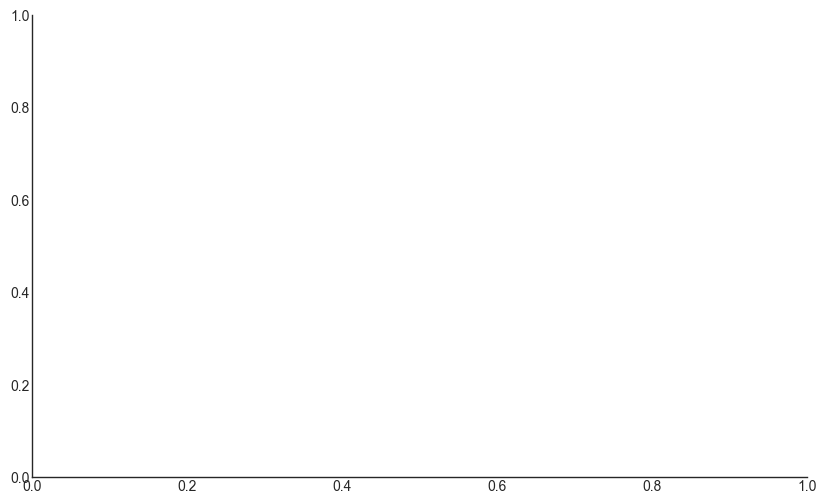

In [9]:
# Extract coefficients, standard errors, and confidence intervals
summary_frame = results.summary().tables[1]

# Extract necessary data
coef = summary_frame['Coef.']
ci_lower = summary_frame['[0.025']
ci_upper = summary_frame['0.975]']
labels = summary_frame.index

label_dict = {
    'Intercept': 'Intercept',
    'C(Window, Treatment(reference=1))[T.Anticipatory]': 'Anticipatory',
    'C(Window, Treatment(reference=1))[T.Consumption]': 'Consumption',
    'C(StimulationType, Treatment(reference=1))[T.CueStimulation]': 'Cue Stimulation',
    'C(StimulationType, Treatment(reference=1))[T.RewardStimulation]': 'Reward Stimulation',
    'C(Cohort)[T.OPN3]': 'Cohort Type',
    'C(Stimulated)[T.1.0]': 'Stimulated Trials',
    'C(Window, Treatment(reference=1))[T.Anticipatory]:C(StimulationType, Treatment(reference=1))[T.CueStimulation]': 'Anticipatory: Cue Stimulation',
    'C(Window, Treatment(reference=1))[T.Consumption]:C(StimulationType, Treatment(reference=1))[T.CueStimulation]': 'Consumption: Cue Stimulation',
    'C(Window, Treatment(reference=1))[T.Anticipatory]:C(StimulationType, Treatment(reference=1))[T.RewardStimulation]': 'Anticipatory: Reward Stimulation',
    'C(Window, Treatment(reference=1))[T.Consumption]:C(StimulationType, Treatment(reference=1))[T.RewardStimulation]': 'Consumption: Reward Stimulation'
}

labels = [label_dict.get(label, label) for label in labels]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(labels))

# Plot the coefficients
ax.barh(y_pos, coef, xerr=[coef - ci_lower, ci_upper - coef], align='center', color='skyblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficient Value')
ax.set_title('GLM Coefficients and Confidence Intervals')

# Add grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()